Chapter 3. 회귀 알고리즘과 모델 규제



##### 03-1. k-최근접 이웃 회귀

지도 학습 알고리즘
1. 분류 : 샘플을 클래스 중 하나로 분류
2. 회귀 : 임의의 어떤 숫자를 예측, 젛해진 클래스가 없고 임의의 수치를 출력
##### 회귀 : 두 변수 사이의 상관관계를 분석하는 방법(프랜시스 골턴)

ex. 특정 농어의 무게 측정
현재 정보; 농어의 길이,높이,두께 뿐
다른 농어의 무게를 정확하게 측정한 데이터 필요


k-NN 분류: 예측 샘플에 가까운 주변 샘플 k개를 확인하여 다수 클래스로 분류
k-NN 회귀: 예측 샘플에 가까운 주변 샘플 k개를 선택 후 수치들의 평균으로 예측


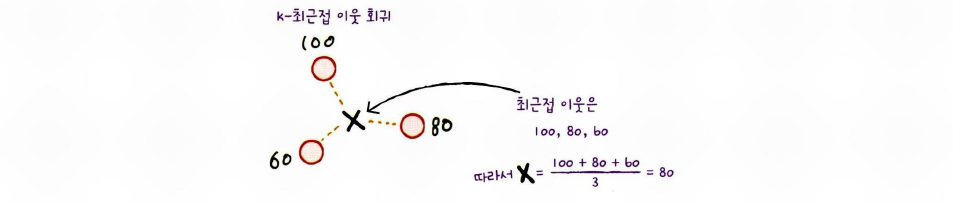

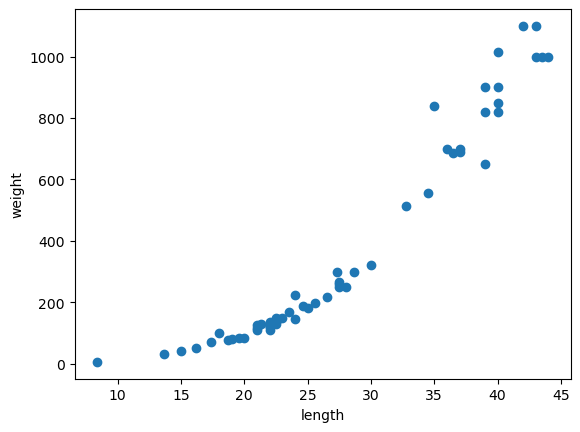

56 56


In [95]:
# 데이터 준비

import numpy as np
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
    21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
    22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
    27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
    36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
    40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
    )

perch_weight = np.array(
    [ 5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
    110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
    130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
    197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
    514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
    820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
    1000.0, 1000.0]
    )


# 1. 데이터가 어떤 형태를 띠고 있는지 산점도
# 2. 특성 데이터는 x축, 타킷 테이블 y출
# 3. 맷플롯립을 임포트하고 scatter() 사용

import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

print(len(perch_length), len(perch_weight))

In [96]:
# 농어 데이터를 머신러닝 모델에 사용하기 전, 🧀훈련 세트와 테스트 세트로 나누기
# 💥사이킷런 train_test_split 통해서 나눔
# 💥사이킷런에 사용할 훈련 세트는 2차원 배열!


from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_length,perch_weight,random_state=42)


test_array = np.array([1,2,3,4])
print(test_array.shape)


test_array = test_array.reshape(2, 2)
print(test_array.shape)

(4,)
(2, 2)


In [97]:
# 넘파이는 배열의 크기를 자동으로 지정하는 기능도 제공
# 크기에 -1을 지정하면 다른 차원을 채우고 남은 원소에 맞게 차원을 지정하라는 의미
# ⭐ reshape(-1,1)과 같이 사용하면 배열의 전체 원소 개수를 외우지 않아도 됨

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [98]:
#🌱결정계수
# 사이킷런_ k-최근접 이웃 '분류' 알고리즘을 구현 클래스 KNeighborsRegressor
# 사이킷런_ k-최근접 이웃 '회귀' 알고리즘을 구현 클래스 KNeighborsClassifier

from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()

#k-NN 회귀모델 훈련
knr.fit(train_input, train_target)


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [99]:
print(knr.score(test_input, test_target))

0.992809406101064


회귀에서는 정확한 숫자를 맞힌다는 것 거의 불가능, 모두 임의의 수치      
결정계수 (R^2)

각 샘플의 타깃과 예측한 값의 차이를 제곱하여 더함       
타깃과 타킷 평균의 차이를 제곱하여 더한 값으로 나누어 줌        

만약 타킷의 평균 정도를 예측하는 수준이라면 R^2 = 0에 가까워지고 (분자분모가 비슷해져)
예측이 타깃에 아주 가까워지면 R^2 = 1에 가까워짐 (분자가 0에 가까워지기 때문)

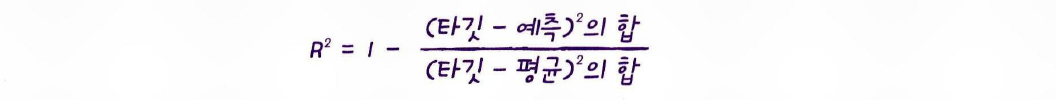

In [100]:
#타킷과 예측한 값 사이의 차이를 구하면 어느 정도 예측이 벗어났는지 가늠
#mean_absolute_eroor는 타킷과 예측의 절댓값 오차를 평균하여 반환

from sklearn.metrics import mean_absolute_error

#test set에 대한 예측 만듦
test_prediction = knr.predict(test_input)

#test set에 대한 평균 절댓값 오차 계산
mae = mean_absolute_error(test_target, test_prediction)
print(mae)


19.157142857142862



# ⬆ 결과에서 예측이 평균적으로 19g 정도 타킷값과 다름
# ??
지금까지 훈련 세트를 사용하여 모델을 훈련 -> 테스트 세트로 모델 평가
그러나 훈련 세트를 사용해 평가한다면? (테스트 세트와는 점수 다를 것)

In [101]:
# 과대적합 vs 과소적합
    # 훈련 세트에서 점수가 굉장히 좋았는데 테스트 세트에서는 점수가 굉장히 나쁘다면 
        # -----> 모델이 훈련 세트에 overfitting
    # 훈련 세트보다 테스트 세트의 점수가 높거나 두 점수가 모두 너무 낮은 경우
        # -----> 모델이 훈련 세트에 underfitting
        #즉, 모델이 너무 단순해서 훈련 세트에 적절히 훈련되지 않음

#🍕🍟 훈련세트가 전체 데이터를 대표한다고 가정하기 때문에 훈련세트를 잘 학습하는 것이 중요!


#print(knr.score(test_input, test_target))
print(knr.score(train_input, train_target))

0.9698823289099254


훈련 세트보다 테스트 세트의 점수가 높으니 과소적합
---> 모델을 조금 더 복잡하게 만들기
---> 훈련 세트에 더 잘 맞게
---> 즉, 이웃의 개수 k개를 줄이는 것
---> 개수를 줄이면 훈련 세트에 있는 국기적인 패턴에 민감해짐 (개수를 늘리면 데이터 전반 일반적 패턴을 따르게 됨)

In [102]:
# k-NN 알고리즘의 기본 k값은 5

# 이웃 개수를 3으로 줄이기
knr.n_neighbors = 3

knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9804899950518966
0.9746459963987609


In [103]:
#🌼마무리
# 회귀는 임의의 수치를 예측
#k-최근접 이웃 회귀는 k-최근접 이웃 알고리즘을 사용해 회귀문제를 푼다.
#가장 가까운 이웃 샘플을 찾고 이 샘플들의 타깃값을 평균하여 예측
#Overffiting의 경우 k-NN이웃의 k값을 늘린다. Underfitting의 경우 k-NN 이웃의 k값을 줄인다.
#결정계수(R^2) : 대표적인 회귀 문제 성능 측정 도구 (1에 가까울수록 좋음)

#핵심패키지와 함수
#🍕사이킷런(scikit-learn)
# KNeighborsRegressor :k-최근접 이웃 회귀 모델을 만드는 사이킷런 클래스, 기본값 '5'
# mean_absolute_error :회귀 모델의 평균 절댓값 오차

#🍕numpy
# reshape() :배열의 크기를 바꾸는 메서드 ex) np.reshapetest_array,（2, 2））= test_array.reshape（2, 2）


In [104]:
# 03-2.선형 회귀
# k-최근접 이웃의 한계

import numpy as np
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
    21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
    22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
    27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
    36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
    40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
    )

perch_weight = np.array(
    [ 5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
    110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
    130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
    197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
    514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
    820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
    1000.0, 1000.0]
    )


from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)

knr.fit(train_input, train_target)

print(knr.predict([[50]]))

[1033.33333333]


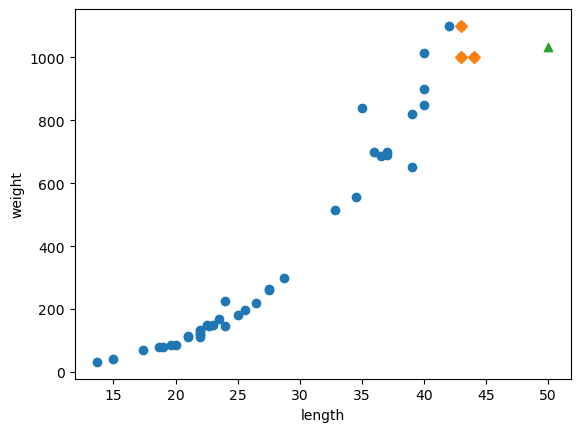

In [105]:
import matplotlib.pyplot as plt

# 50cm 농어 이웃
distances, indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도
plt.scatter(train_input, train_target)

# 훈련 세트 중 이웃 샘플만
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 50cm 농어 데이터
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [106]:
print(np.mean(train_target[indexes]))

1033.3333333333333


In [107]:
print(knr.predict([[100]]))

[1033.33333333]


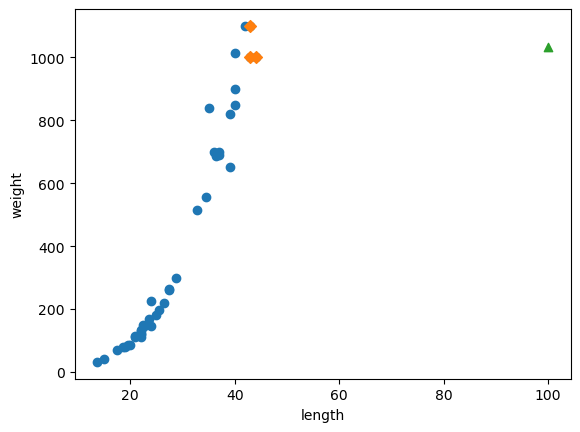

In [108]:
# 100cm 농어의 이웃
distances, indexes = knr.kneighbors([[100]])

# 훈련 세트의 산점도
plt.scatter(train_input, train_target)

# 훈련 세트 중에서 이웃 샘플만 다시 
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
            
# 100cm 농어 데이터
plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

##‼️이런 식이면 농어가 아무리 커져도 무게가 더 늘어나지 않음!
##‼️k-NN으로 해결하려면 가장 큰 농어가 포함된 훈련세트를 다시 만들어야 함!


In [109]:
# 🍒 선형 회귀 linear regression
# 대표적인 회귀 알고리즘이다. 특성이 하나인 경우 어떤 직선응 학습하는 알고리즘
# 사이킷런은 sklearn.linear_model 패키지 아래에 LinearRegression 클래스로 선형 회귀 알고리즘 구현
# 사이킷런의 모델 클래스들은 훈련, 평가, 예측하는 메서드 이름이 모두 동일
# 즉, LinearRegression 클래스에도 fit(), score(), predict() 메서드가 있다


from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 선형 회귀 모델 훈련
lr.fit(train_input, train_target)

# 50cm 농어 예측
print(lr.predict([[50]]))



[1241.83860323]


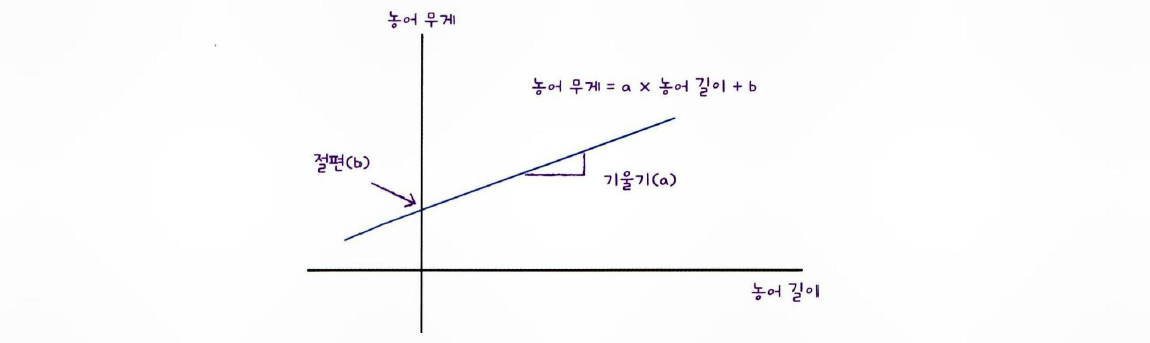

In [110]:
# LinearRegression 클래스가 찾은 a와 b는 lr 객체의 coef_와 intercept_속성에 저장

print(lr.coef_, lr.intercept_)


[39.01714496] -709.0186449535477


## 머신러닝에서 기울기를 종종 계수(coefficient) 또는 가중치(weight)라고 함      
coef_와 intercept—를 머신러닝 알고리즘이 찾은 값이라는 의미로 모델 파라미터(mod이 parameter)라고 부르며 머신러닝 알고리즘의 훈련은 최적의 모델 파라미터를 찾는 것
이를 '모델 기반 학습'

k-NN 에는 모델 파라미터가 없음
훈련세트를 저장하는 것이 훈련의 전부
이를 '사례 기반 학습'

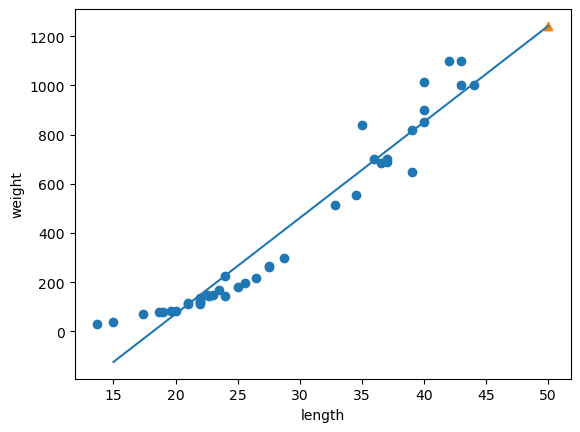

0.939846333997604
0.8247503123313558


In [111]:
# 농어의 길이 15에서 50까지 직선 그리기
# 기울기와 절편을 사용하여 (15, 15乂39-709)와 (50, 50x39-709) 두 점 잇기

plt.scatter(train_input, train_target)

#15~50까지 1차 방정식 그래프
plt.plot([15,50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


##‼️길이가 50cm인 농어가 직선의 연장선에 있다. 훈련 세트 범위를 벗어난 농어의 무게 예측 가능

print(lr.score(train_input, train_target)) # 훈련 세트
print(lr.score(test_input, test_target)) # 테스트 세트



In [112]:
# 다항 회귀
# 선형 회귀가 만든 직선이 왼쪽 아래로 쭉 뻗어 있다
# 최적의 직선을 찾기보다 최적의 곡선
# 🍒 2차 방정식의 그래프를 그리려면 길이를 제곱한 항이 훈련 세트에 추가되어야 -->넘파이 사용!


#train_input 있는모든 원소를 제곱
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))


print(train_poly.shape, test_poly.shape)
#원래 특성 길이를 제곱해서 왼쪽 열에 추가했기 때문에 모두 열이 2개로 증가

(42, 2) (14, 2)


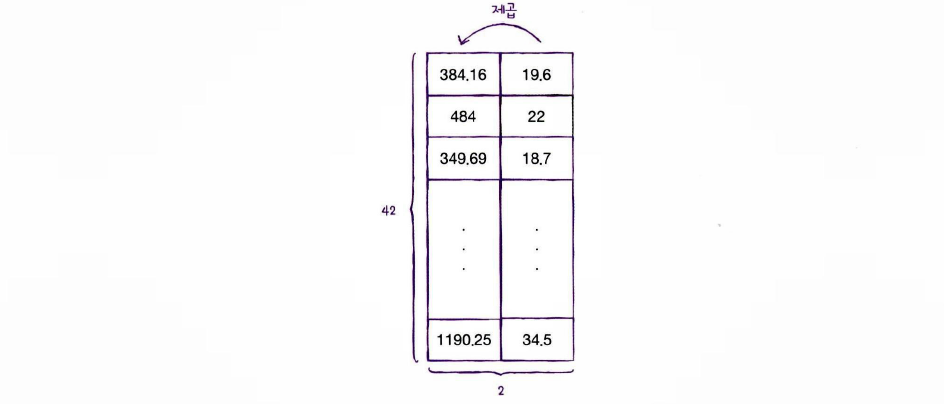

In [113]:
# train_poly를 사용해 선형 회귀 모델을 다시 훈련
# 🍒주목할 점은 2차 방정식 그래프를 찾기 위해 훈련 세트에 제곱 항을 추가했지만, 
#    타깃값은 그대로 사용한다는 것
# 테스트 할 때는 농어 길이의 제곱과 원래 길이를 함께 넣어주어야 함

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.predict([[50**2, 50]]))

print(lr.coef_,lr.intercept_)

[1573.98423528]
[  1.01433211 -21.55792498] 116.0502107827827


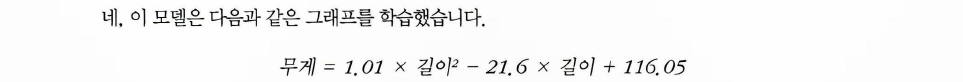

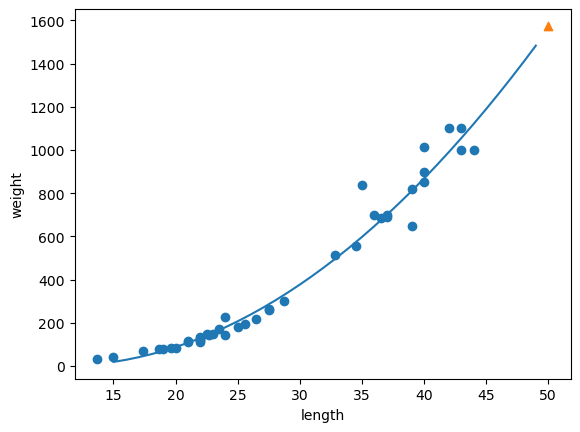

0.9706807451768623
0.9775935108325122


In [114]:
# 🍟🍕 선형 회귀의 선형은 입력과 타깃 사이의 관계가 아니라 !!!!!
# 🍟🍕 가중치(계수)와 타깃 사이의 관계를 의미!!!!!
# 따라서 길이를 제곱하거나 세제곱해도 여전히 선형 회귀
# 이를 다항식을 사용한 선형회귀 = 다항 회귀라고 함

# 구간별 직선을 위한 15~49 정수 배열
point = np.arange(15, 50)

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)

# 15에서 49까지 2차 방정식 그래프를 그립니다
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

# 50cm 농어 데이터
plt.scatter(50, 1574, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()



print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

# 선형 회귀로 훈련 세트 범위 밖의 샘플 예측 마무리

선형회귀 : 특성과 타깃 사이의 관계를 잘 나타내는 선형 방정식/ 특성이 하나면 직선 방정식
        특성과 타깃 사이의 관계는 선형 방정식의 계수 or 가중치에 저장
        
모델 파라미터 : 머신러닝 모델이 특성에서 학습한 파라미터
다항 회귀

# 사이킷런 scikit-learn
LinearRegression _사이킷런의 선형 회귀 클래스
: fitintercept 매개변수를 False로 지정하면 절편을 학습하지 않음
이 매개변수의 기본값은 True

학습된 모델의 coef_ 속성은 특성에 대한 계수를 포함한 배열, 이 배열의 크기는 특성의 개수와 동일
intercept 속성에는 절편이 저장

In [115]:
# 03-3 특성 공학과 규제 p37
# 복잡한 모델의 과대적합을 막기 위한 라쏘 회귀
# 🍟선형 회귀는 특성이 많을 수록(농어 길이,높이,두께 등) 효과 up
# 🍟사이킷런의 PolynomialFeatures 클래스 이용



#### 다중회귀 multiple regression ≠ 다항회귀
여러개 특성을 사용한 선형 회귀
선형(특성1개) ---> 평면(특성2개)
###### 타깃 = ax특성1 +bx특성2 + 절편
특성 3개는 불가
특성이 많은 고차원에서 선형회귀가 복잡한 모델 표현 가능


#### 특성공학 feature engineering
기존의 특성을 사용하여 새로운 특성으로 뽑아내는 작업

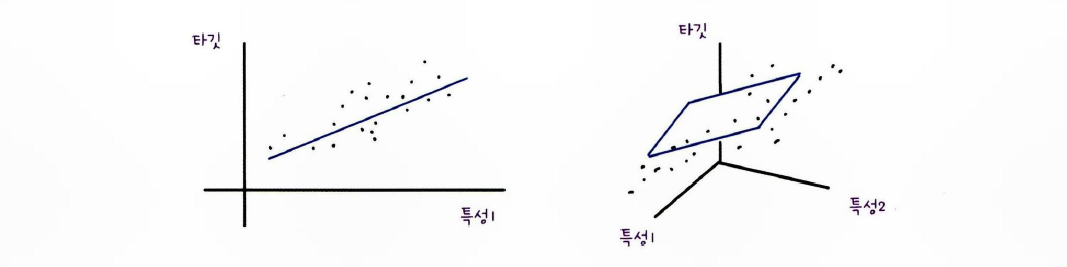

In [116]:
#p40 데이터 준비
#🍕 넘파이는 인터넷에서 데이터 다운로드 X
#🍕 판다스 pandas 가능 (분석 라이브러리)
#🍕 데이터프레임 dataframe은 판다스의 데이터 구조


#1.판다스 사용하여 농어 데이터 인터넷에서 내려받아 dataframe에 저장
#2.타깃 데이터는 넘파이 배열로 만들어 선형 회귀 모델로 훈련
#🍿CSV 파일 (판다스 데이터프레임 만들때 많이 사용)


###### 🍿CSV 파일 
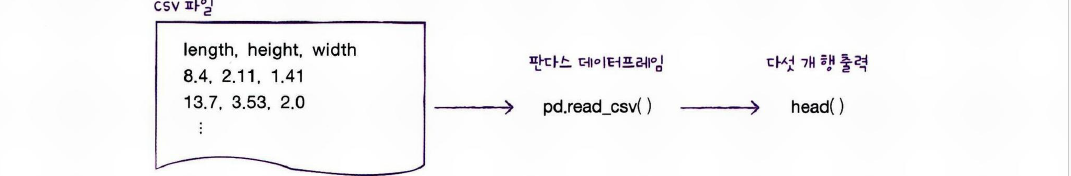

In [117]:
import pandas as pd
perch_full = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full.head()

# 0,1,2,3,4 행번호 : 데이터프레임의 인덱스
# length, height, width : 열 제목
# 판다스는 CSV 파일의 첫 줄을 자동으로 인식해 열 제목으로 만들어 줌

URLError: <urlopen error [SSL: UNEXPECTED_EOF_WHILE_READING] EOF occurred in violation of protocol (_ssl.c:1007)>

In [ ]:
import numpy as np
perch_weight = np.array(
[ 5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
    110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
    130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
    197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
    514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
    820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
    1000.0, 1000.0]
    )

#perch_full과 perch_weight의 훈련세트, 테스트 세트
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_full, perch_weight, random_state=42)

In [ ]:
#🍿사이킷런의 변환기transformer
# 사이킷런의 모델 클래스 : fit(),score(),predic()
# 사이킷런의 변환기 클래스: fit(), transform() 제공

from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# PolynomialFeatures 클래스의 객체를 만들어 fit(), transform() 메서드 차례로 호출
# PolynomialFeatures 클래스의 fit() 메서드는 특성의 개수를 파악하는 것 뿐
# 즉, 훈련데이터와 특성 개수만 동일하다면 fit() 메서드에 아무 값 전달 상관X

poly = PolynomialFeatures()
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

# 선형 방정식의 절편을 항상 값이 1인 특성과 곱해지는 계수

[[1. 2. 3. 4. 6. 9.]]


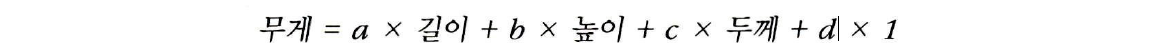

In [ ]:
#사이킷런의 선형 모델은 자동으로 절편 추가해서 굳이 이렇게 특성 만들 필요X
#include_bias=False 지정하여 절편을 위한 항이 제거
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


In [ ]:
#🍒train_input을 변환한 데이터를 train_poly에 저장하고 배열의 크기 확인

poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

## 9개의 특성이 만들어짐
## 9개의 특성이 어떤 조합이지 출력

poly.get_feature_names_out()

(42, 9)


array(['length', ' height', ' width', 'length^2', 'length  height',
       'length  width', ' height^2', ' height  width', ' width^2'],
      dtype=object)

In [ ]:
#🍒test_input을 변환
test_poly = poly.transform(test_input)

In [ ]:
#🍁다중 회귀 모델 훈련하기
## 농어의 길이,높이,두께 모두 사용

#사이킷런의 LinearRegression 클래스를 임포트
from sklearn.linear_model import LinearRegression

#train_poly 사용 -> 모델 훈련
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

print(lr.score(test_poly, test_target))

#🍁농어의 길이만 사용했을 때 underfitting 문제 사라짐

0.9903183436982124
0.9714559911594175


In [ ]:
#🍒 degree 매개변수 사용_필요한 고차항 최대 차수 지정

poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)


(42, 55)


In [ ]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))
#⬆ overfitting 

0.9999999999912403
-144.40786116060949


In [ ]:
# 규제 regularization
# 머신러닝 모델이 훈련세트에 과대적합되지 않도록 만드는 것
#🍁 선형 회귀 모델의 경우 특성에 곱해지는 계수(or 기울기)의 크기를 작게 만드는 일

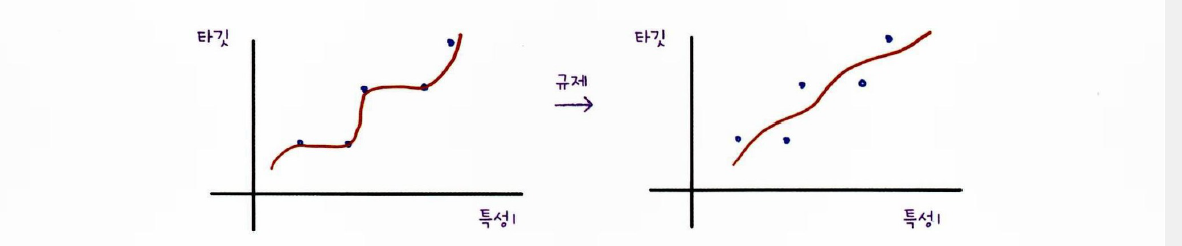

In [ ]:
# 선형 회귀 모델의 계수를 규제하여 훈련 세트 점수 낮추고 테스트 세트 점수 높이기

# 특성의 스케일이 정규화되지 않으면 곱해지는 계수 값도 차이 나게 됨
# 선형 회귀 모델에 규제를 적용할 때 계수 값의 크기가 많이 다르면 공정하게 제어 X
# 규제를 적용하기 전에 정규화 먼저!!


In [ ]:
#표준점수로 변환하기

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

#StandardScaler 클래스의 객체 ss를 초기화한 후 
#PolynomialFeatures 클래스로 만든 train_poly를 사용해 객체를 훈련
#‼️꼭 훈련 세트로 학습한 변환기를 사용해 테스트 세트까지 반환해야 한다!

# 선형 회귀 모델에 규제를 추가한 모델
# 릿지 ridge : 계수를 제곱한 값을 기준으로 규제
# 라쏘 lasso : 계수의 절댓값을 기준으로 규제
#--두 알고리즘 모두 계수의 크기를 줄이지만 라쏘는 아예 0으로 만들 수 있음


In [ ]:
#릿지 회귀 p49
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

#alpha 매개변수로 규제의 강도를 조절한다.
#alpha 값이 크면 규제 강도가 세지므로 계수 값을 더 줄이고 조금 더 과소적합되도록 유도
#alpha 값이 작으면 선형 회귀 모델과 유사해지므로 과대적합될 가능성이 크다.

#적절한 alpha 값을 찾는 한 가지 방법은 alpha 값에 대한 R^2값의 그래프를 그려 보는 것
#훈련세트와 테스트 세트의 점수가 가장 가까운 지점이 최적의 alpha 값이 된다


0.9896101671037343
0.9790693977615383


In [ ]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

In [ ]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    
    #릿지 모델 만듦
    ridge = Ridge(alpha=alpha)
    
    #릿지 모델 훈련
    ridge.fit(train_scaled, train_target)

    #훈련점수와 테스트 점수 저장
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))


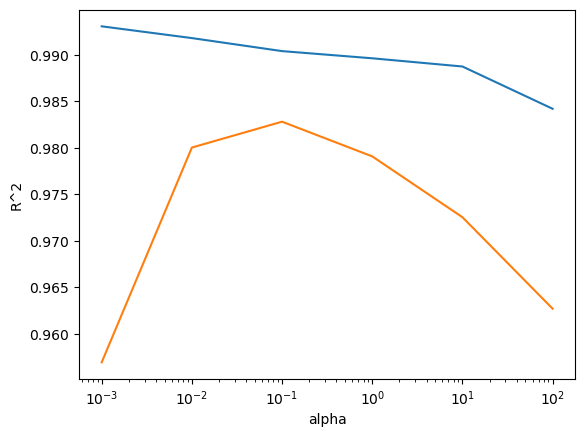

In [ ]:
#alpha_list에 있는 6개의 값을 동일한 간격위해서 x축 로그 스케일

plt.plot(alpha_list, train_score)
plt.plot(alpha_list, test_score)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

위 그래프(Blue:훈련세트, Orange:테스트세트)
과대적합의 전형적인 모습(훈련세트는 잘 맞고 테스트 세트는 안맞음)

In [ ]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))


0.9903815817570369
0.982797646538703


In [ ]:
#라쏘 회귀
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))


0.989789897208096
0.9800593698421886


/home/kooyoonjung/miniconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/home/kooyoonjung/miniconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


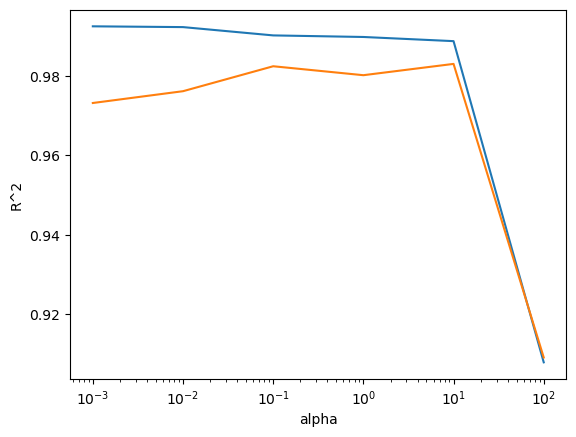

In [119]:
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
    # 라쏘 모델을 만듭니다
    lasso = Lasso(alpha=alpha, max_iter=10000)
    # 라쏘 모델을 훈련합니다
    lasso.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

    
plt. plot(alpha_list, train_score)
plt.plot(alpha_list, test_score)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()


위 그래프에서 왼쪽은 과대적합(훈련세트보다 테스트세트 값 낮음)
오른쪽으로 갈수록 점수가 좁혀지고 있음
가장 오른쪽은 아주 크게 점수 떨어짐 (과소적합)
라쏘 모델에서 최적의 alpha 값은 10^1 = 10이다

In [120]:
print(np.sum(lasso.coef_ == 0))

52


<마무리>

다중회귀: 여러 개의 특성을 사용하는 회귀 모델. 특성이 많으면 선형 모델은 성능이 강해짐
특성 공학: 특성을 조합하여 새로운 특성을 만드는 일련의 작업 과정 
릿지
라쏘 
하이퍼파라미터: 머신러닝 알고리즘이 학습하지 않는 파라미터, 사람이 사전에 지정해야 함
            릿지와 라쏘의 규제 강도 alpha 파라미터

# pandas
read_csv : 인터넷에서 읽어 판다스 데이터프레임으로 변환하는 함수

# scikit-learn
PolynomialFeatures
    degree는 최고 차수를 지정, 기본값 2
    interaction_only True이면 거듭제곱 항은 제외, 특성 간의 곱셈 항만 추가
    기본값은 False
    include_bias가 False이면 절편을 위한 특성 추가X, 기본값 True
Ridge
Lasso
